In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [4]:
df

,user_id,movie_id,rating
0,56,4,5
1,12,6,5
2,0,2,1
3,54,7,5
4,46,3,5
...,...,...,...
988,8,9,1
990,38,1,2
993,40,2,3
995,61,8,3


In [5]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,NaN,1.0,4.0,NaN,4.0,NaN,5.0,NaN,4.0
1,5.0,NaN,1.0,2.0,2.0,1.0,4.0,2.0,3.0,1.0
2,3.0,NaN,4.0,4.0,3.0,NaN,NaN,2.0,3.0,5.0
3,2.0,4.0,NaN,1.0,1.0,2.0,NaN,NaN,2.0,5.0
4,5.0,3.0,1.0,3.0,2.0,3.0,2.0,NaN,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
95,NaN,5.0,3.0,5.0,1.0,3.0,NaN,2.0,3.0,5.0
96,3.0,5.0,3.0,4.0,NaN,2.0,3.0,3.0,NaN,5.0
97,5.0,NaN,NaN,5.0,4.0,3.0,3.0,3.0,2.0,5.0


In [6]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,0.0,1.0,4.0,0.0,4.0,0.0,5.0,0.0,4.0
1,5.0,0.0,1.0,2.0,2.0,1.0,4.0,2.0,3.0,1.0
2,3.0,0.0,4.0,4.0,3.0,0.0,0.0,2.0,3.0,5.0
3,2.0,4.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,5.0
4,5.0,3.0,1.0,3.0,2.0,3.0,2.0,0.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,5.0,3.0,5.0,1.0,3.0,0.0,2.0,3.0,5.0
96,3.0,5.0,3.0,4.0,0.0,2.0,3.0,3.0,0.0,5.0
97,5.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,2.0,5.0


In [7]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.51963422122285

In [8]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.519634,0.675926,0.549634,0.622693,0.683906,0.278747,0.615576,0.702012,0.194184,...,0.394676,0.233882,0.566558,0.702012,0.301941,0.711499,0.747840,0.789339,0.696789,0.718480
1,0.519634,1.000000,0.674330,0.451571,0.802501,0.684035,0.610705,0.489219,0.731805,0.680697,...,0.800641,0.288231,0.429669,0.744208,0.351432,0.431672,0.614413,0.842218,0.508863,0.297805
2,0.675926,0.674330,1.000000,0.632456,0.758671,0.321938,0.734809,0.340909,0.607622,0.712991,...,0.233955,0.412861,0.759064,0.628942,0.408635,0.752298,0.704068,0.810696,0.765339,0.457045
3,0.549634,0.451571,0.632456,1.000000,0.857870,0.354107,0.331953,0.416846,0.337100,0.369998,...,0.278524,0.522233,0.311400,0.701168,0.404520,0.821235,0.772712,0.659223,0.507093,0.393123
4,0.622693,0.802501,0.758671,0.857870,1.000000,0.566365,0.557478,0.494286,0.603864,0.610275,...,0.612531,0.529004,0.394296,0.884229,0.467275,0.760995,0.806471,0.868882,0.688166,0.536302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.711499,0.431672,0.752298,0.821235,0.760995,0.368122,0.452189,0.669854,0.638046,0.431064,...,0.137286,0.648987,0.595355,0.609044,0.354470,1.000000,0.854470,0.656432,0.738138,0.663176
96,0.747840,0.614413,0.704068,0.772712,0.806471,0.471884,0.430405,0.786900,0.689613,0.266519,...,0.489031,0.702198,0.654234,0.786742,0.178069,0.854470,1.000000,0.738663,0.675199,0.533037
97,0.789339,0.842218,0.810696,0.659223,0.868882,0.618172,0.523776,0.492208,0.679018,0.543436,...,0.607782,0.233762,0.487861,0.887250,0.543214,0.656432,0.738663,1.000000,0.742860,0.574490
98,0.696789,0.508863,0.765339,0.507093,0.688166,0.374094,0.603186,0.473781,0.695160,0.469058,...,0.323669,0.411943,0.679883,0.717952,0.569803,0.738138,0.675199,0.742860,1.000000,0.840395


<AxesSubplot:>

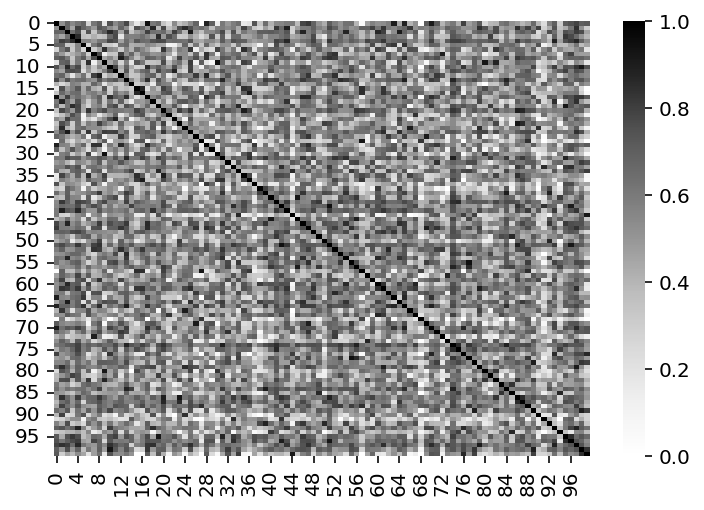

In [9]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [10]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [11]:
k_nearest_neighbors(A, 0, 5)

Int64Index([17, 70, 63, 65, 28], dtype='int64', name='user_id')

In [12]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [13]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,0.0,1.0,4.0,0.0,4.0,0.0,5.0,0.0,4.0
17,1.0,0.0,2.0,4.0,2.0,3.0,0.0,4.0,0.0,4.0
70,2.0,0.0,0.0,3.0,0.0,3.0,0.0,2.0,2.0,3.0
63,4.0,1.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,4.0
65,2.0,0.0,2.0,2.0,0.0,5.0,2.0,5.0,3.0,4.0
28,1.0,1.0,1.0,5.0,0.0,3.0,2.0,5.0,0.0,1.0


In [14]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [17]:
predict_rating(A, 0, 5)

3.8

In [18]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [19]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [20]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [24]:
# Get index for user and movie
user = 'Rahul C'

print(user in df.index)

# Get the movie ratings for user
user_ratings = df.loc[user]
user_ratings

True


Sholay                      3.0
Swades (We The People)      3.0
The Matrix (I)              4.0
Interstellar                4.0
Dangal                      4.0
Taare Zameen Par            4.0
Shawshank Redemption        4.0
The Dark Knight             5.0
Notting Hill                NaN
Uri: The Surgical Strike    NaN
Name: Rahul C, dtype: float64

In [25]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Rahul C,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0
Shrutimoy,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,0.0,2.0
Hitarth Gandhi,3.0,0.0,4.0,5.0,3.0,4.0,5.0,5.0,0.0,0.0
R Yeeshu Dhurandhar,5.0,0.0,4.0,5.0,4.0,4.0,5.0,5.0,0.0,0.0
shridhar,5.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0
Sachin Jalan,4.0,0.0,5.0,5.0,3.0,4.0,4.0,5.0,0.0,3.0


In [26]:
df.describe()

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
count,39.000000,32.000000,38.000000,43.000000,45.000000,44.000000,35.000000,40.000000,21.000000,39.000000
mean,4.102564,3.718750,4.131579,4.581395,3.644444,3.977273,4.400000,4.250000,3.476190,4.230769
std,0.753758,0.958304,0.991070,0.793802,1.003529,1.067242,0.976187,1.080123,0.813575,0.902089
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
25%,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,5.000000,3.000000,4.000000
75%,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

5.0

In [21]:
predict_rating(df_copy, user, 'Sholay')

3.4

In [27]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# D is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D

tensor([[4., 3., 2., 5., 2., 4., 4., 3., 5., 4.],
        [1., 2., 3., 4., 5., 2., 2., 1., 4., 1.],
        [1., 4., 5., 4., 3., 2., 4., 2., 5., 2.],
        [1., 2., 3., 2., 5., 4., 2., 4., 3., 1.],
        [2., 3., 1., 5., 5., 1., 4., 4., 5., 3.],
        [2., 4., 5., 1., 1., 5., 2., 3., 1., 1.],
        [2., 5., 1., 2., 2., 5., 4., 5., 3., 5.],
        [3., 1., 4., 2., 2., 5., 2., 3., 3., 4.],
        [1., 1., 2., 5., 5., 2., 2., 1., 2., 5.],
        [5., 4., 1., 1., 4., 4., 2., 5., 1., 2.],
        [4., 2., 1., 2., 1., 5., 1., 3., 1., 4.],
        [3., 2., 4., 4., 1., 4., 4., 2., 3., 2.],
        [2., 2., 2., 4., 5., 4., 3., 1., 2., 4.],
        [4., 5., 4., 3., 4., 1., 4., 3., 1., 5.],
        [5., 2., 4., 4., 3., 1., 3., 3., 3., 1.],
        [1., 5., 5., 3., 1., 5., 4., 1., 4., 1.],
        [3., 2., 5., 2., 5., 3., 1., 2., 4., 5.],
        [2., 1., 5., 4., 3., 1., 4., 1., 1., 1.],
        [3., 1., 1., 2., 3., 4., 5., 4., 3., 3.],
        [3., 1., 1., 5., 2., 5., 1., 5., 5., 3.],


In [23]:
D.shape

torch.Size([100, 10])

Let us decompose D as AB. A is of shape (n, k) and B is of shape (k, n). We can write the above equation as:
D = AB 

In [28]:
# Randomly initialize A and B

A = torch.randn(n_users, 2, requires_grad=True)
B = torch.randn(n_movies, 2, requires_grad=True)

# Compute the loss

loss = torch.norm(torch.mm(A, B.t()) - D)
loss

tensor(112.6271, grad_fn=<LinalgVectorNormBackward0>)

In [30]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,0.524264,0.363830,-0.686333,0.569968,-1.230030,-0.410660,-0.836353,0.361109,-0.204832,-1.753140
1,2.064197,-0.782522,2.640134,2.749459,-0.938775,-0.972266,0.562981,0.459940,-1.425668,-1.993173
2,-1.156803,-0.030377,-0.348597,-1.433861,1.352612,0.681336,0.500788,-0.461378,0.667887,2.156318
3,2.110378,-1.263404,3.816814,2.916680,-0.143026,-0.859163,1.382228,0.269013,-1.587093,-1.010718
4,2.274173,-1.221377,3.775182,3.111098,-0.401042,-0.966615,1.245646,0.350723,-1.671115,-1.399655
...,...,...,...,...,...,...,...,...,...,...
95,-0.271094,-0.094235,0.128423,-0.316148,0.470534,0.185023,0.269012,-0.145952,0.132166,0.698416
96,-0.553128,-0.254772,0.412769,-0.630798,1.070217,0.395701,0.657679,-0.324934,0.252195,1.563543
97,1.861921,-0.796350,2.599720,2.500680,-0.687248,-0.850650,0.665373,0.375566,-1.311264,-1.597247
98,3.333354,-1.515899,4.871802,4.497489,-1.071355,-1.496645,1.348246,0.633194,-2.372742,-2.659563


In [31]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,4.0,3.0,2.0,5.0,2.0,4.0,4.0,3.0,5.0,4.0
1,1.0,2.0,3.0,4.0,5.0,2.0,2.0,1.0,4.0,1.0
2,1.0,4.0,5.0,4.0,3.0,2.0,4.0,2.0,5.0,2.0
3,1.0,2.0,3.0,2.0,5.0,4.0,2.0,4.0,3.0,1.0
4,2.0,3.0,1.0,5.0,5.0,1.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
95,1.0,4.0,3.0,5.0,2.0,5.0,3.0,1.0,2.0,3.0
96,2.0,2.0,2.0,5.0,4.0,4.0,3.0,3.0,5.0,1.0
97,4.0,2.0,2.0,2.0,5.0,1.0,4.0,4.0,2.0,1.0
98,1.0,1.0,3.0,2.0,5.0,2.0,4.0,5.0,3.0,3.0


In [32]:
# Optimizer

optimizer = optim.Adam([A, B], lr=0.01)

# Train the model

for i in range(1000):
    # Compute the loss
    loss = torch.norm(torch.mm(A, B.t()) - D)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(loss.item())

112.62710571289062
108.92525482177734
105.864013671875
103.14228820800781
100.3882827758789
97.25345611572266
93.47792053222656
88.91209411621094
83.56034088134766
77.6304702758789
71.4714126586914
65.45447540283203
59.91099166870117
55.11323928833008
51.2287712097168
48.287933349609375
46.19685363769531
44.790283203125
43.88166427612305
43.29935836791992
42.91199493408203
42.63471603393555
42.41824722290039
42.235260009765625
42.07093048095703
41.91758346557617
41.7717170715332
41.63225173950195
41.499305725097656
41.37335968017578
41.254825592041016
41.14387512207031
41.04042434692383
40.944252014160156
40.85504913330078
40.772457122802734
40.696102142333984
40.62557601928711
40.56047439575195
40.500396728515625
40.4449348449707
40.393699645996094
40.34634017944336
40.3025016784668
40.26188659667969
40.224212646484375
40.189208984375
40.156639099121094
40.12628173828125
40.09793472290039
40.071414947509766
40.04655456542969
40.023197174072266
40.001197814941406
39.98042297363281
39.9

In [34]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,3.007192,3.316140,3.483459,4.220478,3.838510,3.575429,3.539129,3.376292,3.733709,3.931873
1,0.974175,1.970394,2.661520,4.411837,2.908245,2.106148,2.671284,1.541281,2.793394,2.923805


In [35]:
pd.DataFrame(D).head(2)

,0,1,2,3,4,5,6,7,8,9
0,4.0,3.0,2.0,5.0,2.0,4.0,4.0,3.0,5.0,4.0
1,1.0,2.0,3.0,4.0,5.0,2.0,2.0,1.0,4.0,1.0


In [36]:
def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(A, B.t()) - D)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [38]:
for k in [1, 2, 3, 4, 5, 6, 9]:
    A, B, loss = factorize(D, k)
    print(k, loss.item())

1 43.15137481689453
2 39.25961685180664
3 35.80067825317383
4 32.64104080200195
5 28.294830322265625
6 24.701953887939453
9 10.68772029876709


In [39]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy()).head(2)

,0,1,2,3,4,5,6,7,8,9
0,4.115438,2.987677,2.055727,5.064999,2.033504,4.004031,3.952853,2.940185,4.953001,3.905292
1,0.236143,2.082658,2.630625,3.572773,4.774615,1.970729,2.313552,1.398327,4.311027,1.625913


In [40]:
pd.DataFrame(D).head(2)

,0,1,2,3,4,5,6,7,8,9
0,4.0,3.0,2.0,5.0,2.0,4.0,4.0,3.0,5.0,4.0
1,1.0,2.0,3.0,4.0,5.0,2.0,2.0,1.0,4.0,1.0


In [41]:
# With missing values

# Randomly replace some entries with NaN

D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D[torch.rand(D.shape) < 0.5] = float('nan')
D

tensor([[1., nan, nan, 1., nan, nan, nan, nan, nan, nan],
        [nan, nan, 3., nan, 2., nan, 1., 4., 4., 4.],
        [2., 3., 1., nan, 2., 3., 1., nan, 4., 5.],
        [nan, nan, nan, nan, nan, 4., 2., 3., nan, 3.],
        [nan, nan, 4., nan, 2., nan, 4., nan, nan, 2.],
        [nan, 5., 3., nan, nan, 5., nan, nan, nan, 3.],
        [nan, nan, 3., 4., nan, nan, nan, nan, 1., nan],
        [nan, 5., nan, nan, 2., nan, 1., 3., nan, nan],
        [nan, 3., 2., nan, nan, nan, nan, nan, nan, nan],
        [3., 1., nan, nan, nan, 3., 3., nan, nan, 1.],
        [3., 3., nan, nan, 1., 1., nan, nan, 1., nan],
        [2., 2., nan, 2., nan, 2., 2., nan, 5., 5.],
        [nan, nan, nan, nan, nan, 3., 2., nan, 5., nan],
        [nan, 2., 4., 2., nan, 3., 2., nan, 5., 1.],
        [nan, nan, nan, nan, nan, 2., 4., 2., nan, nan],
        [3., nan, nan, 3., 3., nan, 3., 1., 4., 5.],
        [2., nan, nan, 4., 3., nan, nan, 2., 5., nan],
        [1., 5., nan, nan, 4., nan, nan, nan, 5., 4.],
    

In [42]:
A, B, loss = factorize(D, 2)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

In [43]:
mask = ~torch.isnan(D)
mask

tensor([[ True, False, False,  True, False, False, False, False, False, False],
        [False, False,  True, False,  True, False,  True,  True,  True,  True],
        [ True,  True,  True, False,  True,  True,  True, False,  True,  True],
        [False, False, False, False, False,  True,  True,  True, False,  True],
        [False, False,  True, False,  True, False,  True, False, False,  True],
        [False,  True,  True, False, False,  True, False, False, False,  True],
        [False, False,  True,  True, False, False, False, False,  True, False],
        [False,  True, False, False,  True, False,  True,  True, False, False],
        [False,  True,  True, False, False, False, False, False, False, False],
        [ True,  True, False, False, False,  True,  True, False, False,  True],
        [ True,  True, False, False,  True,  True, False, False,  True, False],
        [ True,  True, False,  True, False,  True,  True, False,  True,  True],
        [False, False, False, False, Fal

In [44]:
mask.sum()

tensor(522)

In [46]:
A = torch.randn(D.shape[0], k, requires_grad=True)
B = torch.randn(D.shape[1], k, requires_grad=True)

diff_matrix = torch.mm(A, B.t())-D
diff_matrix.shape

torch.Size([100, 10])

In [47]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([522])

In [48]:
# Modify the loss function to ignore NaN values

def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(A, B.t())-D
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [51]:
A, B, loss = factorize(D, 5)
loss

tensor(8.3795, grad_fn=<LinalgVectorNormBackward0>)

In [52]:
torch.mm(A, B.t())

tensor([[ 1.0002e+00, -6.1860e-01,  1.6844e+00,  9.9991e-01, -2.2450e+00,
         -4.0025e-01, -9.3873e-01,  4.5819e+00,  8.8804e-01,  2.8812e-01],
        [ 3.4045e+00,  4.3689e+00,  3.4459e+00,  7.1197e+00,  2.2094e+00,
          3.5827e+00,  6.9298e-01,  3.9435e+00,  3.7188e+00,  3.8646e+00],
        [ 1.8525e+00,  3.5934e+00,  2.3619e+00,  6.9679e+00,  2.2771e+00,
          3.0910e+00,  6.2187e-01,  7.6504e-01,  2.4307e+00,  4.5831e+00],
        [ 2.5042e+00,  2.7107e+00,  2.6498e+00,  1.0070e+00,  3.5360e+00,
          4.0030e+00,  2.0012e+00,  2.9972e+00,  2.6560e+00,  3.0001e+00],
        [-2.0035e+00, -7.5789e-01,  4.0035e+00, -2.6083e+00,  2.0150e+00,
         -3.2294e+00,  3.9778e+00,  1.5164e+00,  2.0601e+00,  1.9979e+00],
        [ 3.3313e+00,  5.0005e+00,  2.9979e+00,  1.9324e+00,  6.2719e+00,
          5.0010e+00,  3.4474e+00,  1.9747e+00,  3.9212e+00,  3.0002e+00],
        [ 2.4918e+00, -8.6924e-01,  2.9974e+00,  3.9993e+00, -3.6196e+00,
          3.3461e+00, -2.6180e+0

In [44]:
# Now use matrix factorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)
    

    

In [46]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [49]:
model(torch.tensor([0]), torch.tensor([0]))

tensor([2.0891], grad_fn=<SumBackward1>)